In [1]:
#Importing the modules 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
#Load Dataset 
df = pd.read_csv('winequality.csv')

In [4]:
#Sneak Peak into the dataset 
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
#Viewing the statistical information
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
#Getting the information about the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
#Check null values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
#Fill the missing value with mean 
for column, value in df.items():
    if column != 'type':
        df[column] = df[column].fillna(df[column].mean())

In [9]:
#Check again for the null values
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

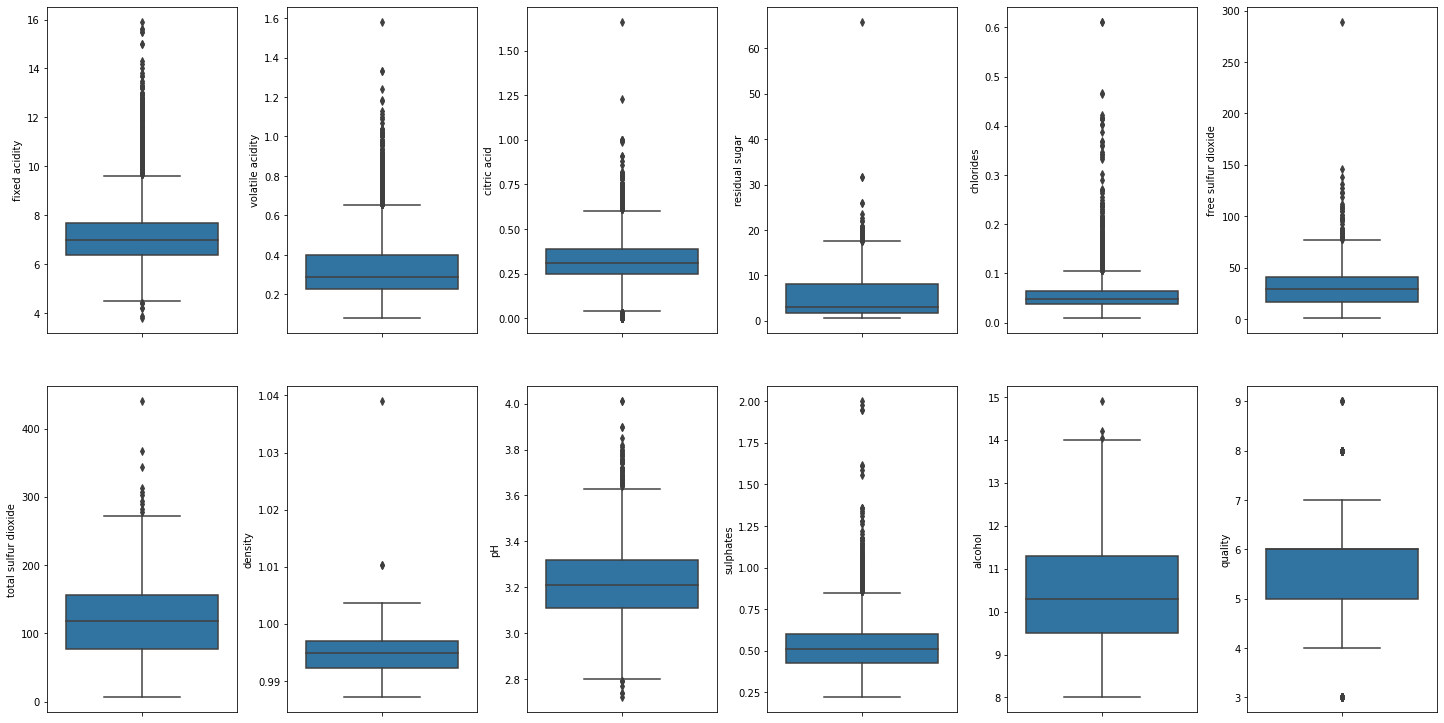

In [10]:
#Checking for the outliers 
figure, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
i = 0
ax = ax.flatten()

for column, value in df.items():
    if column != 'type':
        sns.boxplot(y=column, data=df, ax=ax[i])
        i += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)    

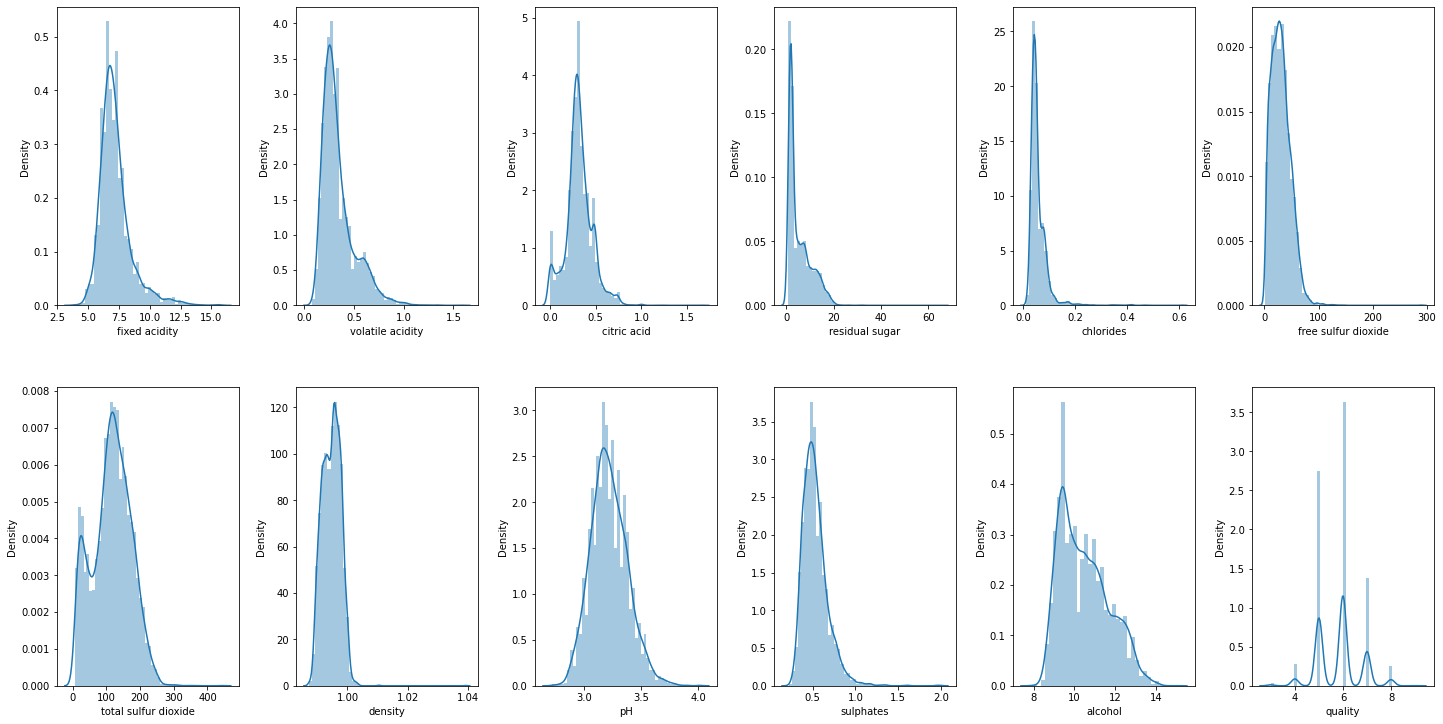

In [11]:
#Creating a distribution plot
figure, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
i = 0
ax = ax.flatten()

for column, value in df.items():
    if column != 'type':
        sns.distplot(value, ax=ax[i])
        i += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0) 

In [12]:
#Changing Suplfur-di-oxide, Volatile acidity, residual sugar right skewed curve to normal distribution curve.
#Using Log Transformation
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])
df['volatile acidity'] = np.log(1 + df['volatile acidity'])
df['residual sugar'] = np.log(1 + df['residual sugar'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

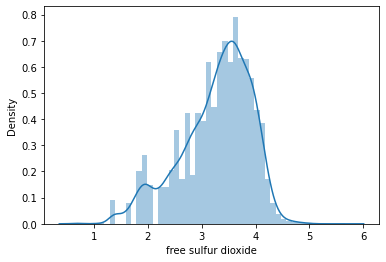

In [13]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

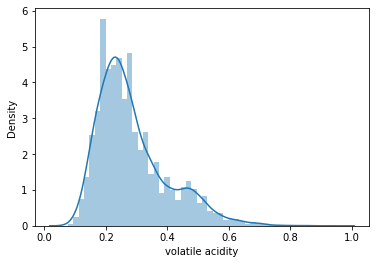

In [14]:
sns.distplot(df['volatile acidity'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

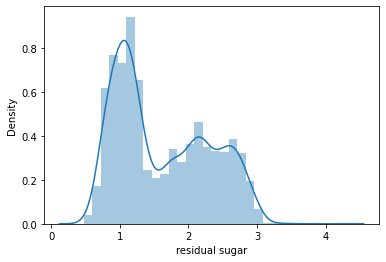

In [15]:
sns.distplot(df['residual sugar'])

<AxesSubplot:xlabel='type', ylabel='count'>

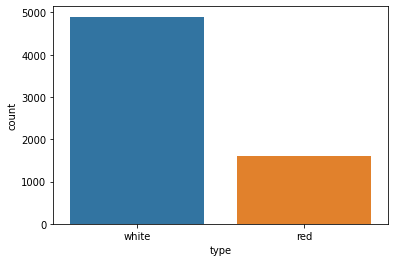

In [16]:
#View how much dataset is for white wine and red wine
sns.countplot(df['type'])

<AxesSubplot:xlabel='quality', ylabel='count'>

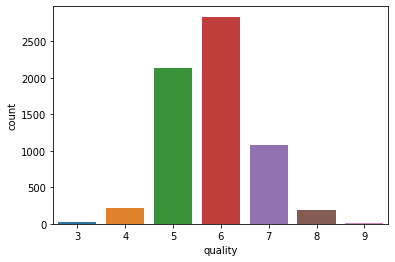

In [17]:
#For the classification part we need to know
#How many class we have 
sns.countplot(df['quality'])

<AxesSubplot:>

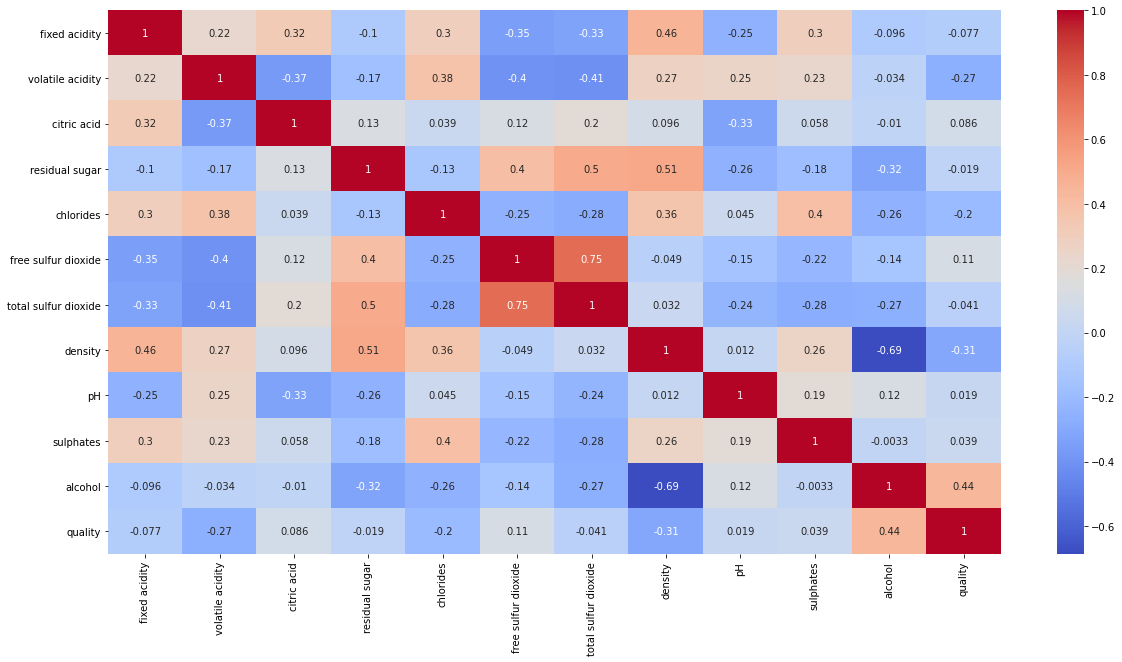

In [18]:
#Coorelation Matrix
corr = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [19]:
#Input split
X = df.drop(columns=['type','quality'])
Y = df['quality']

In [20]:
#How many data values are there for each class
Y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [21]:
#Balance the imabalanced classes
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)

In [22]:
#Transform the dataset 
X, Y = oversample.fit_resample(X, Y)

In [23]:
#Again check how many data values are there for each class
Y.value_counts()

9    2836
8    2836
7    2836
6    2836
5    2836
4    2836
3    2836
Name: quality, dtype: int64

In [26]:
#Model Training using classification
from sklearn.model_selection import cross_val_score, train_test_split

def classify(model, X, Y):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    
    #Train the model
    model.fit(x_train, y_train)
    print('Accuracy : ', model.score(x_test, y_test) *100)
    
    #cross-validation
    score = cross_val_score(model, X, Y, cv=5)
    print("Cross Validation Score : ", np.mean(score)*100)

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, Y)

Accuracy :  35.03929075156156
Cross Validation Score :  31.130083533831872


In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, Y)

Accuracy :  80.83820269997986
Cross Validation Score :  75.2519722649156


In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, Y)

Accuracy :  88.19262542816844
Cross Validation Score :  82.51068863872648


In [31]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, Y)

Accuracy :  88.85754583921015
Cross Validation Score :  83.36194335887323
